## 章節 1 - 如何零基礎入門深度學習

# <font color='LIGHTGREEN'>單元 5 - 數據分析與視覺化實作</font>

## <font color='SKYBLUE'>本單元課程大綱:</font>
### 1-5-1.數據分析 pandas🐼
### 1-5-2.圖表繪製 Matplotlib📊

### AI深度學習常用的`python`模組
### 1.`tensorflow` 匯入後縮寫 `tf`，深度學習底層運算程式庫
### 2.`NumPy` 匯入後縮寫 `np`，矩陣運算程式庫
### 3.`Pandas` 匯入後縮寫 `pd`，數據分析程式庫
### 4.`Matplotlib.pyplot` 匯入後縮寫`plt`，繪圖程式庫 

## 1-5-1. 數據分析 pandas🐼

###  `Pandas`好用功能: 載入數據成為資料`結構物件`(DataFrame)
### 快速進行數十萬筆資料的`分群`、`排序`、`加總`

In [0]:
#1501 匯入模組
import pandas as pd #數據分析
import numpy as np  #矩陣運算

### 一行程式，快速取得台銀牌告匯率
http://rate.bot.com.tw/xrt?Lang=zh-TW

In [0]:
#1502 讀取網頁html檔資料成為df(DataFrame)
#pd.read_html()回傳是DataFrame的list，選第0個df
df=pd.read_html('http://rate.bot.com.tw/xrt?Lang=zh-TW')[0] #台銀匯率網頁 
print(type(df)) #資料型態

<class 'pandas.core.frame.DataFrame'>


### 顯示df

In [0]:
#1503 行列結構資料表或是試算表(橫-列，直-行或欄)
df.head() #預設顯示前5列，值可改

幣別  ... Unnamed: 16_level_0
                       幣別  ... Unnamed: 16_level_1
0      美金 (USD)  美金 (USD)  ...                 NaN
1      港幣 (HKD)  港幣 (HKD)  ...                 NaN
2      英鎊 (GBP)  英鎊 (GBP)  ...                 NaN
3      澳幣 (AUD)  澳幣 (AUD)  ...                 NaN
4  加拿大幣 (CAD)  加拿大幣 (CAD)  ...                 NaN

[5 rows x 17 columns]

### 掛接雲端硬碟，保存課程練習產生的檔案

In [0]:
#1503 操作雲端硬碟的課程檔案
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### cd變更所在資料夾

In [0]:
#1504 營業額數據csv檔在1-5內sales資料夾內
%cd "/content/drive/My Drive/94AI深度學習-新手入門應用篇/\ #註解
章節 1 - 如何零基礎入門深度學習/1-5_數據分析與視覺化實作"

/content/drive/My Drive/94AI深度學習-新手入門應用篇/章節 1 - 如何零基礎入門深度學習/1-5_數據分析與視覺化實作


### 讀取`CSV檔`營業額數據

資料來源: https://www.kaggle.com/c/demand-forecasting-kernels-only/overview

### pd讀取csv檔案，無參數
### 檔案內容是某公司2013/1/1~2017/12/31， 
### 這5年間、10家分店，50種商品，每日銷售金額(美元)

In [0]:
#1505 讀取csv檔資料成為df(DataFrame)行列結構資料表或是試算表
# 
df=pd.read_csv('sales/train.csv')  #相對路徑
df  #df.head()
#索引欄、4欄數據:日期date、商店store、商品item、銷售額sales，注意最左邊索引欄為 0,1,2,3....

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


總共有91萬3千筆資料

### pd讀取csv檔案，附加參數
### 設定`date`日期作為索引，成為有`時間序列`的資料

In [0]:
#1506
#參數說明 parse_dates指定對date做日期序列解析
#index_col指定某一列作為索引
train = pd.read_csv('sales/train.csv', 
    parse_dates=['date'], index_col=['date'])
train #train.head()
#日期date(索引)、3欄數據:商店store、商品item、銷售額sales

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,10,50,63
2017-12-28,10,50,59
2017-12-29,10,50,74


### `df.shape`顯示數據量`(913000x3)`

In [0]:
#1507 df的名稱.shape
train.shape #(913,000 筆資料, 3 欄位)

(913000, 3)

In [0]:
913000/30 #相當於3萬多頁的Excel表格

30433.333333333332

### 計算各分店`store`之2013~2017 `5年總銷售金額` 
### 91萬多筆資料(3萬頁)，用Execl要幾個步驟?做多久?


In [0]:
#1508 groupby數據分析，一行程式不用1秒
%%time
df1 = train.groupby('store').sum() #建立新的df
print df1
#groupby(store)依store分組，.sum()加總
#item的加總無意義請忽略

          item    sales
store                  
1      2328150  4315603
2      2328150  6120128
3      2328150  5435144
4      2328150  5012639
5      2328150  3631016
6      2328150  3627670
7      2328150  3320009
8      2328150  5856169
9      2328150  5025976
10     2328150  5360158
CPU times: user 37.4 ms, sys: 6.77 ms, total: 44.2 ms
Wall time: 47 ms


python+pandas速度完勝

### 練習1. 對特定產品`item`求 `銷售總額`

In [0]:
#1509 groupby數據分析
%%time
df2=train.groupby(['item']).sum()
print(df2)
#store的加總無意義請忽略

       store    sales
item                 
1     100430   401384
2     100430  1069564
3     100430   669087
4     100430   401907
5     100430   335230
6     100430  1068281
7     100430  1068777
8     100430  1405108
9     100430   938379
10    100430  1337133
11    100430  1271925
12    100430  1271534
13    100430  1539621
14    100430  1071531
15    100430  1607442
16    100430   468480
17    100430   602486
18    100430  1538876
19    100430   736892
20    100430   867641
21    100430   736190
22    100430  1469971
23    100430   534979
24    100430  1205975
25    100430  1473334
26    100430   869981
27    100430   402628
28    100430  1604713
29    100430  1271240
30    100430   736554
31    100430  1070845
32    100430   803107
33    100430  1270183
34    100430   469935
35    100430  1201541
36    100430  1406548
37    100430   534258
38    100430  1470330
39    100430   801311
40    100430   534094
41    100430   401759
42    100430   669925
43    100430   936635
44    1004

### 練習1-1:品項太多，只查單一產品`item`的銷售總額

In [0]:
#1509a df.loc依照列名稱選定資料
df2.loc[12]

store     100430
sales    1271534
Name: 12, dtype: int64

## 1-5-2.圖表繪製 Matplotlib

### 匯入模組 Importing Matplotlib

Matplotlib匯入後縮寫``mpl``,就如同
NumPy匯入後縮寫 ``np``, Pandas匯入後縮寫 ``pd`` 

In [0]:
#1510 匯入Matplot(一般念法)
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic') #設定主題配色 classic, ggplot, bmh 

### 繪製圖表時 ``plt`` 是最常用的模組
### 延伸學習：設定主題配色 classic ggplot bmh 
https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html

### 練習繪製圖表

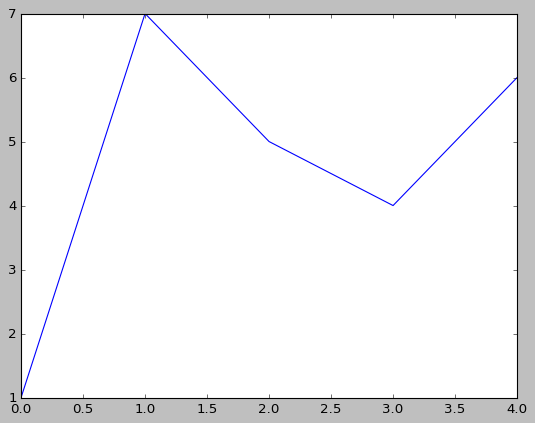

In [0]:
#1510a 
plt.plot([1, 7, 5, 4, 6])
#plt.show()

### 狀況來了! BOSS<font color='yellow'>現在就要</font>看圖 : 那一個`產品`賣的好  os:有沒有搞錯`91萬`筆資料耶~
使用`groupby`依照`item`分組(橫軸)，`sum()`值加總，`plot.bar()`繪柱狀圖

`y='sales'`縱軸，`figsize=(x,y)`出圖尺寸

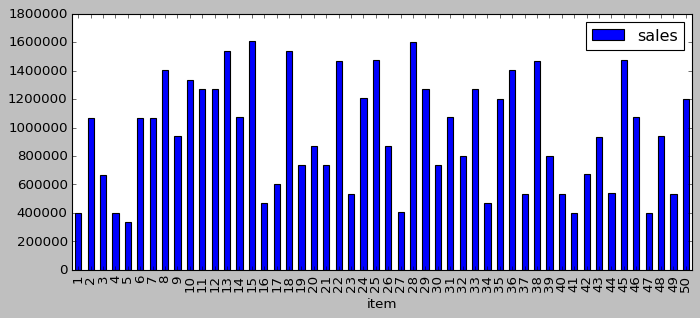

In [0]:
#1511 一行搞定，先分組`item`看`sales`金額
#使用groupby依照item分組(橫軸)，sum()值加總，plot.bar()繪柱狀圖，y='sales'縱軸，figsize=(10,4)出圖尺寸
#設定圖形尺寸 figsize=(10寬,4高) 單位英寸
train.groupby('item').sum().plot.bar(y='sales',figsize=(10,4)) 

### BOSS還要排序!......... os: `OOXX%#@X`
 `df.sort_values('sales')`依照指定欄排序，預設為升序，降序：`ascending=False` ，`color='pink'`自訂顏色

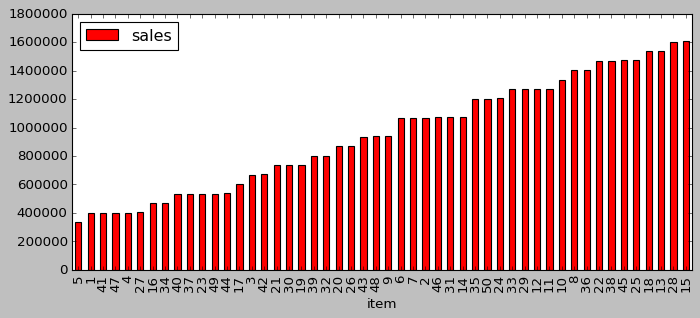

In [0]:
#1512 還是一行搞定，還可以依照BOSS的喜好換顏色
# df.sort_values('sales')依照指定欄排序，預設為升序，降序：ascending=False color='pink'自訂顏色
train.groupby('item').sum().sort_values(by='sales').plot.bar(y='sales',
        figsize=(10,4), color='red'') #引號多一個

### 延伸學習
color='可自訂' 詳https://matplotlib.org/tutorials/colors/colors.html

### 練習2. 哪一家分店長準備走路?
分商店`store`繪製`sales`營業額圖表

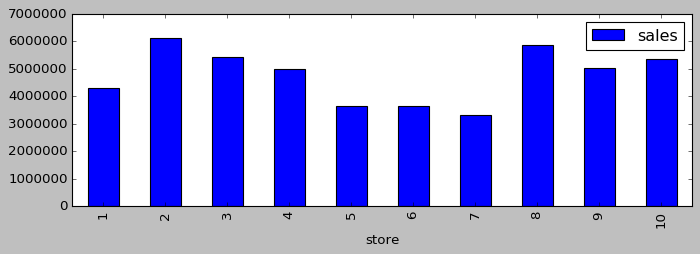

In [0]:
#1513
train.groupby('store').sum().plot.bar(y='sales',figsize=(10,3))

### 練習3. BOS還要看排名

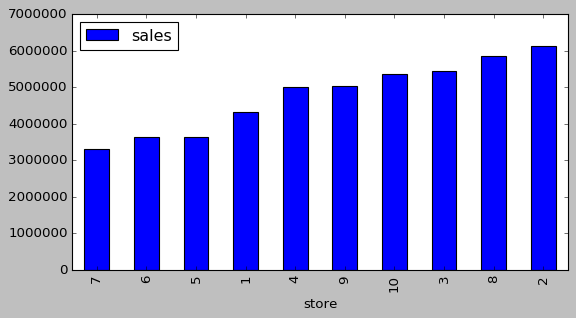

In [0]:
#1514
train.groupby('store').sum().sort_values(by='sales').plot.bar(y='sales',figsize=(8,4))

## Homework: 自主延伸學習

### pandas python教程
https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#min
### matplot python教程
https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

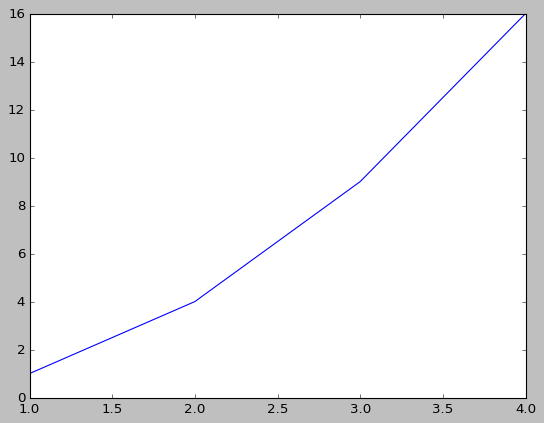

In [0]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

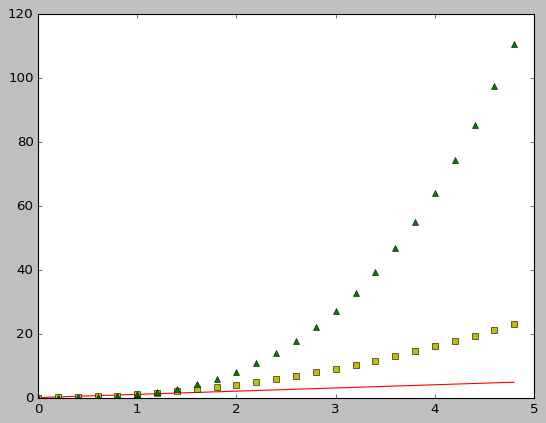

In [0]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r-', t, t**2, 'ys', t, t**3, 'g^')
plt.show()

## 1-5 總結

### 1-5的內容會比較難，windows軟體直覺，python需要理解，同學要慢慢消化，先會操作就好
### 數據分析與視覺化，其實只是輔助理解，深度學習的數據特徵，並不影響模型訓練與應用~
### 主要是讓同學實際體驗操作，python的強大，營業額數據在2-5，會實作營業額的預測，可以思考，工作上是否也有類似的數據，未來有沒有可能實作與應用呢?

# NEXT: 1-6_學會深度學習的關鍵流程